In [6]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt
%matplotlib inline

from helper import nmi_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load a set of reviews for a book

In [7]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/10149142-the-family-fang.json


In [8]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f)).T

In [9]:
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]

list_texts = list(df['text'])
list_titles = list(df.index)
list_dt = list(df['delta'])

list_m = [len(text) for text in list_texts]
D = len(list_texts)

# Make the graph

In [10]:
## create the model and make the graph.
model = sbmtm()
model.make_graph(list_texts,documents = list_titles)
g = model.g## this is the graph

V = model.get_V()
D = model.get_D()
V,D

(3568, 234)

# Run the inference a few times | n_init = 1

In [12]:
## run the inference
## what are the statistics to be extracted?

list_mdl = []
list_c_td = []
list_c_tw = []
list_Bwd = []
## mdl


n_rep = 5 ## number of different runs
n_init = 1 ## number of fits in each run; use the solution with lowest mdl

## we always look at the lowest level in the hierarchy
for i in range(n_rep):

    model.fit(n_init=n_init)
    mdl = model.mdl
    
    L = model.L
    ## group memberhsip on uppermost level
    p_td_d, p_tw_w = model.group_membership(l=0)
    c_td = np.argmax(p_td_d,axis=0)
    c_tw = np.argmax(p_tw_w,axis=0)
    
    list_mdl += [mdl]
    list_c_td += [c_td]
    list_c_tw += [c_tw]
    
    B_d = len(set(c_td))
    B_w = len(set(c_tw))
#     B = B_d + B_w
    list_Bwd += [(B_d,B_w)]
    

### Evaluate different solutions

In [13]:
## sort according to mdl
indsort = np.argsort(list_mdl)
list_mdl = np.array(list_mdl)[indsort]
list_c_td = np.array(list_c_td)[indsort]
list_c_tw = np.array(list_c_tw)[indsort]
list_Bwd = np.array(list_Bwd)[indsort]

Text(0,0.5,'mdl')

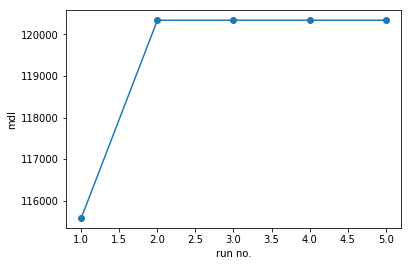

In [14]:
## value of the mdl across different runs
plt.plot(np.arange(n_rep)+1,list_mdl,marker='o')
plt.xlabel('run no.')
plt.ylabel('mdl')

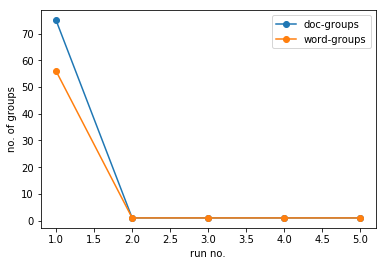

In [15]:
## number of groups
plt.plot(np.arange(n_rep)+1,[h[0] for h in list_Bwd],label='doc-groups',marker='o')
plt.plot(np.arange(n_rep)+1,[h[1] for h in list_Bwd],label='word-groups',marker='o')

plt.xlabel('run no.')
plt.ylabel('no. of groups')
plt.legend()

In [16]:
## calculate the nmi between group membership of nodes using nmi
## we do it separately for doc-nodes and word-nodes
arr_nmi_d = np.nan*np.zeros((n_rep,n_rep))
arr_nmi_w = np.nan*np.zeros((n_rep,n_rep))

for i in range(n_rep):
    c_td_i = list_c_td[i]
    c_tw_i = list_c_tw[i]
    for j in range(n_rep):
        c_td_j = list_c_td[j]
        c_tw_j = list_c_tw[j]
        if i<j:
            nmi = nmi_score(c_td_i,c_td_j)
            arr_nmi_d[i,j] = nmi
            nmi = nmi_score(c_tw_i,c_tw_j)
            arr_nmi_w[i,j] = nmi
                
                

/DRIVE/REPOS/goodreads/reviews_analysis/helper.py:41: RuntimeWarning: invalid value encountered in double_scalars
  NMI = 2.0*MI/(H1+H2)


Text(0.5,1,'NMI words')

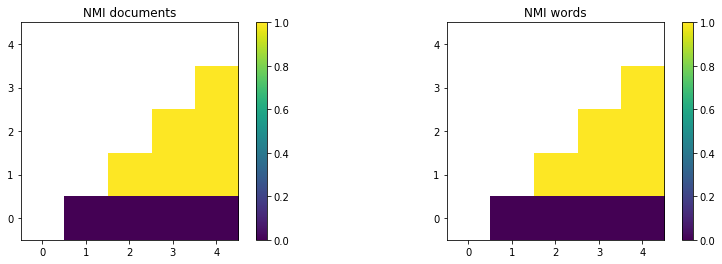

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(arr_nmi_d,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI documents')

plt.subplot(122)
plt.imshow(arr_nmi_w,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI words')


In [18]:
print(np.nanmin(arr_nmi_d), np.nanmax(arr_nmi_d))
print(np.nanmin(arr_nmi_w), np.nanmax(arr_nmi_w))

1.0559257923494068e-16 1.0
0.0 1.0


It seems that the trivial solution with only 1 block for words and documents each is a local minimum in the Optimization landscape.

Possible solutions:

- run the algorithm several times and choose the minimum mdl from all runs

# Run the inference a few times | n_init = 10

In [19]:
## run the inference
## what are the statistics to be extracted?

list_mdl = []
list_c_td = []
list_c_tw = []
list_Bwd = []
## mdl


n_rep = 5 ## number of different runs
n_init = 10 ## number of fits in each run; use the solution with lowest mdl

## we always look at the lowest level in the hierarchy
for i in range(n_rep):

    model.fit(n_init=n_init)
    mdl = model.mdl
    
    L = model.L
    ## group memberhsip on uppermost level
    p_td_d, p_tw_w = model.group_membership(l=0)
    c_td = np.argmax(p_td_d,axis=0)
    c_tw = np.argmax(p_tw_w,axis=0)
    
    list_mdl += [mdl]
    list_c_td += [c_td]
    list_c_tw += [c_tw]
    
    B_d = len(set(c_td))
    B_w = len(set(c_tw))
#     B = B_d + B_w
    list_Bwd += [(B_d,B_w)]
    

### Evaluate different solutions

In [20]:
## sort according to mdl
indsort = np.argsort(list_mdl)
list_mdl = np.array(list_mdl)[indsort]
list_c_td = np.array(list_c_td)[indsort]
list_c_tw = np.array(list_c_tw)[indsort]
list_Bwd = np.array(list_Bwd)[indsort]

Text(0,0.5,'mdl')

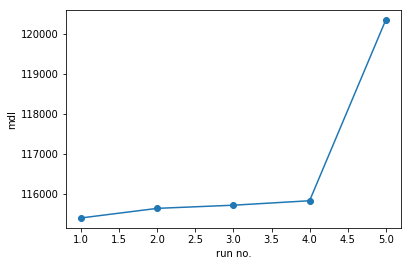

In [21]:
## value of the mdl across different runs
plt.plot(np.arange(n_rep)+1,list_mdl,marker='o')
plt.xlabel('run no.')
plt.ylabel('mdl')

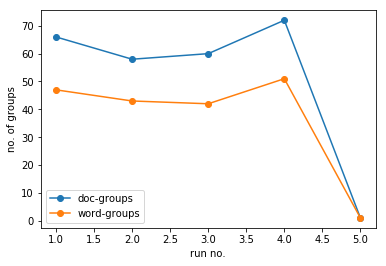

In [22]:
## number of groups
plt.plot(np.arange(n_rep)+1,[h[0] for h in list_Bwd],label='doc-groups',marker='o')
plt.plot(np.arange(n_rep)+1,[h[1] for h in list_Bwd],label='word-groups',marker='o')

plt.xlabel('run no.')
plt.ylabel('no. of groups')
plt.legend()

In [23]:
## calculate the nmi between group membership of nodes using nmi
## we do it separately for doc-nodes and word-nodes
arr_nmi_d = np.nan*np.zeros((n_rep,n_rep))
arr_nmi_w = np.nan*np.zeros((n_rep,n_rep))

for i in range(n_rep):
    c_td_i = list_c_td[i]
    c_tw_i = list_c_tw[i]
    for j in range(n_rep):
        c_td_j = list_c_td[j]
        c_tw_j = list_c_tw[j]
        if i<j:
            nmi = nmi_score(c_td_i,c_td_j)
            arr_nmi_d[i,j] = nmi
            nmi = nmi_score(c_tw_i,c_tw_j)
            arr_nmi_w[i,j] = nmi
                
                

Text(0.5,1,'NMI words')

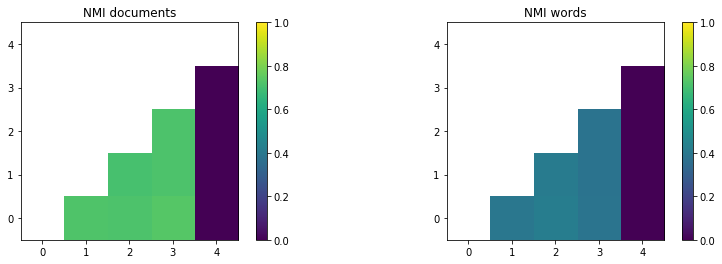

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.imshow(arr_nmi_d,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI documents')

plt.subplot(122)
plt.imshow(arr_nmi_w,origin='lower',vmin=0,vmax=1)
plt.colorbar()
plt.title('NMI words')


In [25]:
print(np.nanmin(arr_nmi_d), np.nanmax(arr_nmi_d))
print(np.nanmin(arr_nmi_w), np.nanmax(arr_nmi_w))

0.0 0.7344410404162595
0.0 0.4219325378097684
